In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read CSV file and display df
TSLA = pd.read_csv('Resources/TSLA.csv')
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2838,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2839,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2840,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2841,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


In [3]:
#Verifying information of each column
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


In [4]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2.843000e+03
mean,105.868475,108.031370,103.555733,105.924597,105.924597,3.141524e+07
std,188.738974,192.483055,184.638617,188.836358,188.836358,2.841880e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,10.698000,11.026000,10.420000,10.727000,10.727000,1.251050e+07
50%,45.874001,46.493999,45.102001,45.916000,45.916000,2.481500e+07
75%,65.021000,66.251999,64.015001,65.275002,65.275002,4.012025e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [5]:
#Detecting missing values
TSLA.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
#Converting Date 'object' into 'datetime'
# TSLA['Date'] = pd.to_datetime(TSLA['Date'])
TSLA["Date"] = pd.to_datetime(TSLA.Date,format="%Y-%m-%d")
TSLA.index = TSLA['Date']

In [7]:
TSLA.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
print(f'Dataframe contains stock prices between {TSLA.Date.min()} and {TSLA.Date.max()}') 
print(f'Total days = {(TSLA.Date.max()  - TSLA.Date.min()).days} days')

Dataframe contains stock prices between 2010-07-01 00:00:00 and 2021-10-14 00:00:00
Total days = 4123 days


In [9]:
TSLA['Date']

Date
2010-07-01   2010-07-01
2010-07-02   2010-07-02
2010-07-06   2010-07-06
2010-07-07   2010-07-07
2010-07-08   2010-07-08
                ...    
2021-10-08   2021-10-08
2021-10-11   2021-10-11
2021-10-12   2021-10-12
2021-10-13   2021-10-13
2021-10-14   2021-10-14
Name: Date, Length: 2843, dtype: datetime64[ns]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

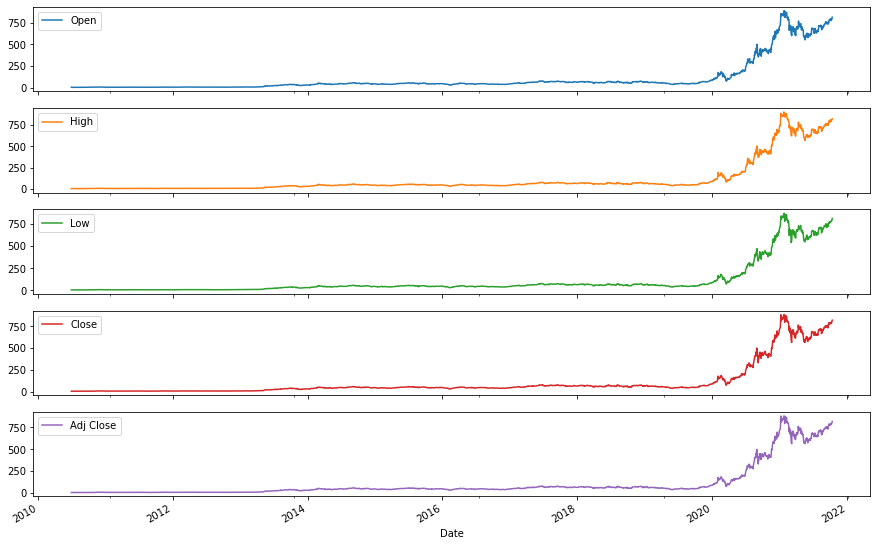

In [10]:
TSLA[['Open','High','Low','Close','Adj Close']].plot(kind='line', figsize=(15,10), subplots= True)

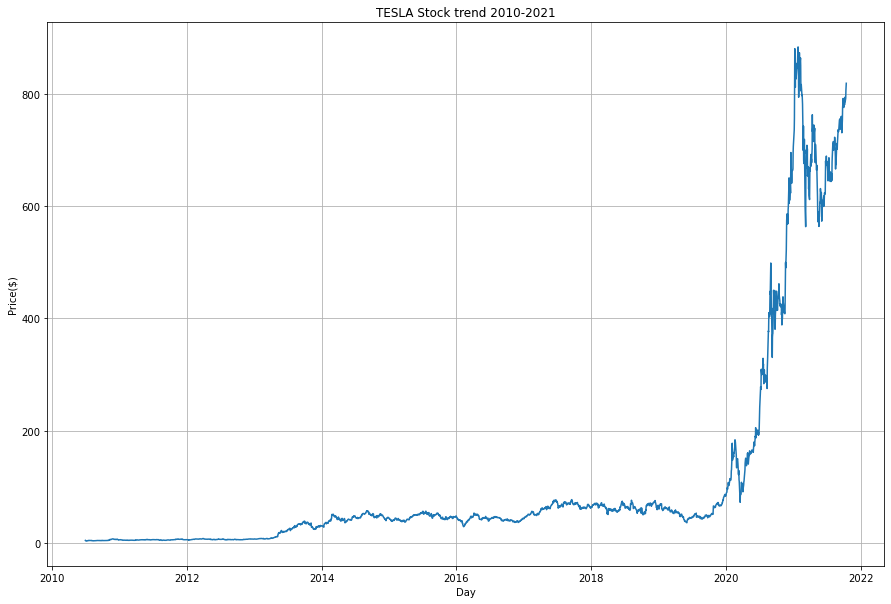

In [11]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 10))

# Add x-axis and y-axis
ax.plot(TSLA['Date'].index.values,
       TSLA[['Close']])

# Set title and labels for axes
ax.set(xlabel="Day",
       ylabel="Price($)",
       title='TESLA Stock trend 2010-2021')

plt.grid()
plt.show()

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [13]:
data = TSLA.sort_index(ascending=True,axis=0)
new_dataset = pd.DataFrame(index=range(0,len(TSLA)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i] = data['Date'][i]
    new_dataset["Close"][i] = data["Close"][i]

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
final_dataset = new_dataset.values
train_data = final_dataset[0:987,:]
valid_data = final_dataset[987:,:]
new_dataset.index = new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset)
x_train_data,y_train_data = [],[]

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data = np.array(x_train_data),np.array(y_train_data)
x_train_data = np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))